# Box Office

Kaggle TMDB Box Office Prediction Competition 2019

Authors: Sean Trinh, Hariharan Vijayachandran

Part 1 - Process the data.

In [670]:
'''
    Process the data.
'''
import pandas as pd

#train_df = pd.read_csv('./data/tmdb_5000_movies.csv')
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

cc_train = pd.read_csv('./data/train.csv')
cc_test = pd.read_csv('./data/test.csv')

date_train = pd.read_csv('./data/train.csv')
date_test = pd.read_csv('./data/test.csv')

train_df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [671]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

In [672]:
to_drop = ['release_date','id','genres','homepage','original_title','title','original_language','overview',
           'production_companies','production_countries','spoken_languages','status','tagline', 'keywords',
           'belongs_to_collection', 'imdb_id','poster_path','Keywords','cast','crew']
for x in to_drop:
    try:
        train_df = train_df.drop(x,axis=1)
        if x!= 'revenue':
            test_df = test_df.drop(x,axis=1)
    except:
        pass

#cc_train, cc_test
to_drop1 = ['budget','runtime','popularity','release_date','id','genres',
            'homepage','original_title','title','original_language','overview',
            'production_companies','production_countries','spoken_languages','status','tagline', 'keywords',
            'belongs_to_collection', 'imdb_id','poster_path','Keywords']
for x in to_drop1:
    try:
        cc_train = cc_train.drop(x,axis=1)
        if x != 'revenue':
            cc_test = cc_test.drop(x,axis=1)
    except:
        pass

#'keywords','vote_average','vote_count'
#'belongs_to_collection', #imdb_id, #poster_path, #Keywords, #cast, #crew, vote average, vote count
cc_train['cast'] = cc_train['cast'].apply(lambda x: x.count('{') if type(x)==str else 0)
cc_test['cast'] = cc_test['cast'].apply(lambda x: x.count('{') if type(x)==str else 0)
        
cc_train['crew'] = cc_train['crew'].apply(lambda x: x.count('{') if type(x)==str else 0)
cc_test['crew'] = cc_test['crew'].apply(lambda x: x.count('{') if type(x)==str else 0)

#date_train, date_test
to_drop2 = ['budget','runtime','popularity','id','genres','homepage','original_title','title','original_language',
            'overview','production_companies','production_countries','spoken_languages','status','tagline',
            'keywords','belongs_to_collection', 'imdb_id','poster_path','Keywords','cast','crew']
for x in to_drop2:
    try:
        date_train = date_train.drop(x,axis=1)
        if x != 'revenue':
            date_train = date_train.drop(x,axis=1)
    except:
        pass
    
date_train['release_month'] = date_train['release_date'].apply(lambda x:int(x.split('/')[0]) if type(x)==str else 0 )
date_train['release_year'] = date_train['release_date'].apply(lambda x:int(x.split('/')[2])if type(x)==str else 0 )
# train_df['release_date'] = train_df['release_date'].apply(lambda x:int(x.split('/')[1])if type(x)==str else 0 )
date_test['release_month'] = date_test['release_date'].apply(lambda x:int(x.split('/')[0])if type(x)==str else 0 )
date_test['release_year'] = date_test['release_date'].apply(lambda x:int(x.split('/')[2]) if type(x)==str else 0)
# test_df['release_date'] = train_df['release_date'].apply(lambda x:int(x.split('/')[1])if type(x)==str else 0 )

def ap(x):
    if type(x) == str:
        x = int(x.split('/')[2])
        if x<=19:
            return 2000+x
        else:
            return 1900+x
    else:
        return 0

date_train['release_year'] = date_train['release_date'].apply(ap)
date_test['release_year'] = date_test['release_date'].apply(ap)
date_train.drop('release_date',axis = 1, inplace = True)
date_test.drop('release_date',axis = 1, inplace = True)

In [673]:
train_df.head()

,budget,popularity,runtime,revenue
0,14000000,6.575393,93.0,12314651
1,40000000,8.248895,113.0,95149435
2,3300000,64.299990,105.0,13092000
3,1200000,3.174936,122.0,16000000
4,0,1.148070,118.0,3923970


In [674]:
cc_train.head()

,cast,crew,revenue
0,24,72,12314651
1,20,9,95149435
2,51,64,13092000
3,7,3,16000000
4,4,2,3923970


In [675]:
date_train.head()

,revenue,release_month,release_year
0,12314651,2,2015
1,95149435,8,2004
2,13092000,10,2014
3,16000000,3,2012
4,3923970,2,2009


In [676]:
train=train_df.sample(frac=0.7,random_state=200)
test=train_df.drop(train.index)

cc_train_s = cc_train.sample(frac=0.7, random_state=200)
cc_test_s = cc_train.drop(cc_train_s.index)

date_train_s = date_train.sample(frac=0.7, random_state=200)
date_test_s = date_train.drop(date_train_s.index)

In [677]:
print(len(train))
print(len(test))
print(len(cc_train_s))
print(len(cc_test_s))
print(len(date_train_s))
print(len(date_test_s))

2100
900
2100
900
2100
900


In [678]:
import numpy as np
train_df = train_df.apply(np.log)

def f(x):
    if x<0:
        return 0
    return x
train_df = train_df.applymap(f)
train_df = train_df.fillna(0)
X = train_df.drop('revenue',axis = 1)
Y = train_df['revenue']

cc_train['revenue'] = cc_train['revenue'].apply(np.log)
cc_train = cc_train.applymap(f)
cc_train = cc_train.fillna(0)
X1 = cc_train.drop('revenue',axis = 1)
Y1 = cc_train['revenue']

date_train['revenue'] = date_train['revenue'].apply(np.log)
date_train = date_train.applymap(f)
date_train = date_train.fillna(0)
X2 = date_train.drop('revenue', axis = 1)
Y2 = date_train['revenue']

test = test.apply(np.log)
test = test.applymap(f)
test = test.fillna(0)
X_test =test.drop('revenue',axis = 1)
Y_test = test['revenue']

cc_test_s['revenue'] = cc_test_s['revenue'].apply(np.log)
cc_test_s = cc_test_s.applymap(f)
cc_test_s = cc_test_s.fillna(0)
X1_test = cc_test_s.drop('revenue', axis = 1)
Y1_test = cc_test_s['revenue']

date_test_s['revenue'] = date_test_s['revenue'].apply(np.log)
date_test_s = date_test_s.applymap(f)
date_test_s = date_test_s.fillna(0)
X2_test = date_test_s.drop('revenue', axis = 1)
Y2_test = date_test_s['revenue']

train_df.head()

,budget,popularity,runtime,revenue
0,16.454568,1.883334,4.532599,16.326300
1,17.504390,2.110079,4.727388,18.370959
2,15.009433,4.163559,4.653960,16.387512
3,13.997832,1.155287,4.804021,16.588099
4,0.000000,0.138082,4.770685,15.182614


In [679]:
cc_train.head()

,cast,crew,revenue
0,24,72,16.326300
1,20,9,18.370959
2,51,64,16.387512
3,7,3,16.588099
4,4,2,15.182614


In [680]:
date_train.head()

,revenue,release_month,release_year
0,16.326300,2,2015
1,18.370959,8,2004
2,16.387512,10,2014
3,16.588099,3,2012
4,15.182614,2,2009


In [681]:
from keras import models, layers, regularizers, optimizers
model=models.Sequential()
model.add(layers.Dense(356, activation='relu', input_shape=(X.shape[1],)))
model.add(layers.Dropout(0.1)) #0.2
#with dropout(0.1) -> MSLE: 0.0582, loss: 5.8997, Val_MSLE: 0.0582, Val_loss: 5.7661
#with dropout(0.2) -> MSLE: 0.0623, loss: 7.5476, val_MSLE: 0.0602, val_loss: 6.7981
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10,activation='relu'))
# model.add(layers.Dropout(0.1))
# model.add(layers.Dense(10,activation='relu'))
model.add(layers.Dense(1))
model.summary()
model.compile(optimizer=optimizers.rmsprop(lr=1e-5),loss='mse'
,metrics=['mean_squared_logarithmic_error'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_189 (Dense)            (None, 356)               1424      
_________________________________________________________________
dropout_47 (Dropout)         (None, 356)               0         
_________________________________________________________________
dense_190 (Dense)            (None, 256)               91392     
_________________________________________________________________
dense_191 (Dense)            (None, 10)                2570      
_________________________________________________________________
dense_192 (Dense)            (None, 1)                 11        
Total params: 95,397
Trainable params: 95,397
Non-trainable params: 0
_________________________________________________________________


In [682]:
history=model.fit(X,Y,epochs=40,batch_size = 32, validation_data=(X_test, Y_test)) #32

Train on 3000 samples, validate on 900 samples
Epoch 1/40
3000/3000 [==============================] - 3s 875us/step - loss: 218.5010 - mean_squared_logarithmic_error: 3.9956 - val_loss: 197.0234 - val_mean_squared_logarithmic_error: 2.9944
Epoch 2/40
3000/3000 [==============================] - 0s 93us/step - loss: 178.2040 - mean_squared_logarithmic_error: 2.4711 - val_loss: 159.8208 - val_mean_squared_logarithmic_error: 1.9762
Epoch 3/40
3000/3000 [==============================] - 0s 97us/step - loss: 141.5479 - mean_squared_logarithmic_error: 1.6504 - val_loss: 123.1090 - val_mean_squared_logarithmic_error: 1.3262
Epoch 4/40
3000/3000 [==============================] - 0s 93us/step - loss: 108.4616 - mean_squared_logarithmic_error: 1.1387 - val_loss: 91.9861 - val_mean_squared_logarithmic_error: 0.9232
Epoch 5/40
3000/3000 [==============================] - 0s 94us/step - loss: 80.0709 - mean_squared_logarithmic_error: 0.8014 - val_loss: 66.6337 - val_mean_squared_logarithmic_erro

EVALUATE AND GRAPH

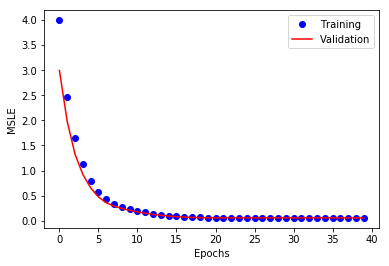

In [683]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['mean_squared_logarithmic_error']
val_acc = history.history['val_mean_squared_logarithmic_error']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training')
plt.plot(epochs, val_acc, 'r', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('MSLE')
plt.legend()
plt.show()

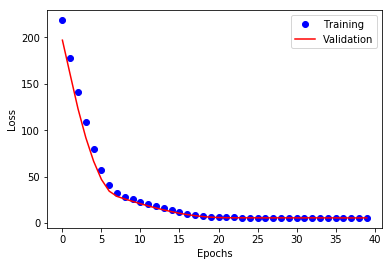

In [684]:
import matplotlib.pyplot as plt
%matplotlib inline

l1 = history.history['loss']
l2 = history.history['val_loss']

epochs = range(len(l1))

plt.plot(epochs, l1, 'bo', label='Training')
plt.plot(epochs, l2, 'r', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

CREW AND CAST

In [685]:
from keras import models, layers, regularizers, optimizers
model2=models.Sequential()
model2.add(layers.Dense(356, activation='relu', input_shape=(X1.shape[1],)))
model2.add(layers.Dropout(0.1)) #0.2
model2.add(layers.BatchNormalization())
#with dropout(0.1) -> MSLE: 0.0582, loss: 5.8997, Val_MSLE: 0.0582, Val_loss: 5.7661
#with dropout(0.2) -> MSLE: 0.0623, loss: 7.5476, val_MSLE: 0.0602, val_loss: 6.7981
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dense(10,activation='relu'))
# model.add(layers.Dropout(0.1))
# model.add(layers.Dense(10,activation='relu'))
model2.add(layers.Dense(1))
model2.summary()
model2.compile(optimizer=optimizers.rmsprop(lr=1e-5),loss='mse'
,metrics=['mean_squared_logarithmic_error'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_193 (Dense)            (None, 356)               1068      
_________________________________________________________________
dropout_48 (Dropout)         (None, 356)               0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 356)               1424      
_________________________________________________________________
dense_194 (Dense)            (None, 256)               91392     
_________________________________________________________________
dense_195 (Dense)            (None, 10)                2570      
_________________________________________________________________
dense_196 (Dense)            (None, 1)                 11        
Total params: 96,465
Trainable params: 95,753
Non-trainable params: 712
_________________________________________________________________


In [686]:
history2=model2.fit(X1, Y1, epochs=40, batch_size = 32, validation_data=(X1_test, Y1_test))

Train on 3000 samples, validate on 900 samples
Epoch 1/40
3000/3000 [==============================] - 3s 1ms/step - loss: 224.6110 - mean_squared_logarithmic_error: 4.4036 - val_loss: 217.0712 - val_mean_squared_logarithmic_error: 3.9513
Epoch 2/40
3000/3000 [==============================] - 0s 107us/step - loss: 201.6966 - mean_squared_logarithmic_error: 3.2707 - val_loss: 194.1510 - val_mean_squared_logarithmic_error: 3.0104
Epoch 3/40
3000/3000 [==============================] - 0s 111us/step - loss: 180.3734 - mean_squared_logarithmic_error: 2.5491 - val_loss: 173.6823 - val_mean_squared_logarithmic_error: 2.3750
Epoch 4/40
3000/3000 [==============================] - 0s 117us/step - loss: 159.9593 - mean_squared_logarithmic_error: 2.0007 - val_loss: 155.1192 - val_mean_squared_logarithmic_error: 1.9072
Epoch 5/40
3000/3000 [==============================] - 0s 111us/step - loss: 141.3805 - mean_squared_logarithmic_error: 1.5996 - val_loss: 138.0375 - val_mean_squared_logarithmic

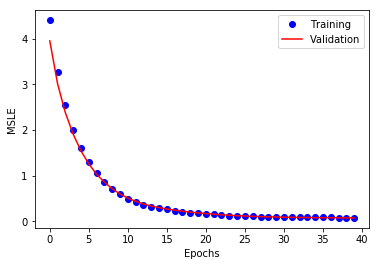

In [687]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history2.history['mean_squared_logarithmic_error']
val_acc = history2.history['val_mean_squared_logarithmic_error']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training')
plt.plot(epochs, val_acc, 'r', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('MSLE')
plt.legend()
plt.show()

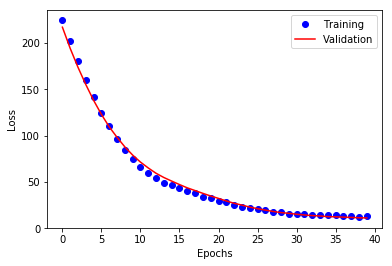

In [688]:
import matplotlib.pyplot as plt
%matplotlib inline

l1 = history2.history['loss']
l2 = history2.history['val_loss']

epochs = range(len(l1))

plt.plot(epochs, l1, 'bo', label='Training')
plt.plot(epochs, l2, 'r', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

DATE

In [695]:
from keras import models, layers, regularizers, optimizers
model3=models.Sequential()
model3.add(layers.Dense(356, activation='relu', input_shape=(X2.shape[1],)))
model3.add(layers.Dropout(0.1)) #0.2
#with dropout(0.1) -> MSLE: 0.0582, loss: 5.8997, Val_MSLE: 0.0582, Val_loss: 5.7661
#with dropout(0.2) -> MSLE: 0.0623, loss: 7.5476, val_MSLE: 0.0602, val_loss: 6.7981
model3.add(layers.Dense(256, activation='relu'))
model3.add(layers.Dense(10,activation='relu'))
# model.add(layers.Dropout(0.1))
# model.add(layers.Dense(10,activation='relu'))
model3.add(layers.Dense(1))
model3.summary()
model3.compile(optimizer=optimizers.rmsprop(lr=1e-5),loss='mse'
,metrics=['mean_squared_logarithmic_error'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_201 (Dense)            (None, 356)               1068      
_________________________________________________________________
dropout_50 (Dropout)         (None, 356)               0         
_________________________________________________________________
dense_202 (Dense)            (None, 256)               91392     
_________________________________________________________________
dense_203 (Dense)            (None, 10)                2570      
_________________________________________________________________
dense_204 (Dense)            (None, 1)                 11        
Total params: 95,041
Trainable params: 95,041
Non-trainable params: 0
_________________________________________________________________


In [696]:
history3=model3.fit(X2, Y2, epochs=100, batch_size = 32, validation_data=(X2_test, Y2_test))

Train on 3000 samples, validate on 900 samples
Epoch 1/100
3000/3000 [==============================] - 3s 948us/step - loss: 23170.2936 - mean_squared_logarithmic_error: 5.0161 - val_loss: 3356.7556 - val_mean_squared_logarithmic_error: 2.3558
Epoch 2/100
3000/3000 [==============================] - 0s 101us/step - loss: 2141.8623 - mean_squared_logarithmic_error: 1.6256 - val_loss: 277.8073 - val_mean_squared_logarithmic_error: 0.5671
Epoch 3/100
3000/3000 [==============================] - 0s 95us/step - loss: 180.0083 - mean_squared_logarithmic_error: 0.9322 - val_loss: 31.2307 - val_mean_squared_logarithmic_error: 0.1459
Epoch 4/100
3000/3000 [==============================] - 0s 100us/step - loss: 95.6211 - mean_squared_logarithmic_error: 0.8130 - val_loss: 10.0745 - val_mean_squared_logarithmic_error: 0.0775
Epoch 5/100
3000/3000 [==============================] - 0s 97us/step - loss: 81.5854 - mean_squared_logarithmic_error: 0.7650 - val_loss: 10.4550 - val_mean_squared_logarit

3000/3000 [==============================] - 0s 100us/step - loss: 14.7527 - mean_squared_logarithmic_error: 0.0915 - val_loss: 9.7606 - val_mean_squared_logarithmic_error: 0.0742
Epoch 44/100
3000/3000 [==============================] - 0s 95us/step - loss: 13.6937 - mean_squared_logarithmic_error: 0.0859 - val_loss: 11.2563 - val_mean_squared_logarithmic_error: 0.0762
Epoch 45/100
3000/3000 [==============================] - 0s 96us/step - loss: 13.9868 - mean_squared_logarithmic_error: 0.0879 - val_loss: 10.1670 - val_mean_squared_logarithmic_error: 0.0740
Epoch 46/100
3000/3000 [==============================] - 0s 95us/step - loss: 13.3104 - mean_squared_logarithmic_error: 0.0852 - val_loss: 11.5293 - val_mean_squared_logarithmic_error: 0.0769
Epoch 47/100
3000/3000 [==============================] - 0s 95us/step - loss: 13.5136 - mean_squared_logarithmic_error: 0.0856 - val_loss: 11.6906 - val_mean_squared_logarithmic_error: 0.0774
Epoch 48/100
3000/3000 [========================

3000/3000 [==============================] - 0s 97us/step - loss: 10.8157 - mean_squared_logarithmic_error: 0.0760 - val_loss: 10.5489 - val_mean_squared_logarithmic_error: 0.0746
Epoch 86/100
3000/3000 [==============================] - 0s 95us/step - loss: 10.9069 - mean_squared_logarithmic_error: 0.0765 - val_loss: 10.2963 - val_mean_squared_logarithmic_error: 0.0742
Epoch 87/100
3000/3000 [==============================] - 0s 93us/step - loss: 10.6458 - mean_squared_logarithmic_error: 0.0754 - val_loss: 10.3164 - val_mean_squared_logarithmic_error: 0.0742
Epoch 88/100
3000/3000 [==============================] - 0s 95us/step - loss: 10.7353 - mean_squared_logarithmic_error: 0.0756 - val_loss: 10.1879 - val_mean_squared_logarithmic_error: 0.0741
Epoch 89/100
3000/3000 [==============================] - 0s 95us/step - loss: 10.7318 - mean_squared_logarithmic_error: 0.0758 - val_loss: 10.5444 - val_mean_squared_logarithmic_error: 0.0746
Epoch 90/100
3000/3000 [========================

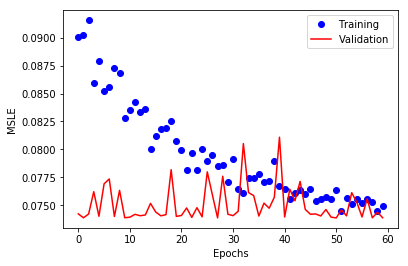

In [701]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history3.history['mean_squared_logarithmic_error'][40:]
val_acc = history3.history['val_mean_squared_logarithmic_error'][40:]

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training')
plt.plot(epochs, val_acc, 'r', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('MSLE')
plt.legend()
plt.show()

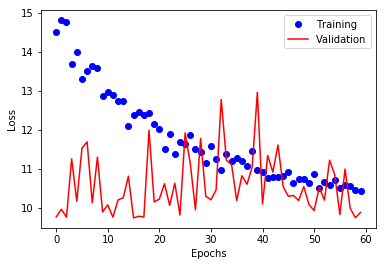

In [702]:
import matplotlib.pyplot as plt
%matplotlib inline

l1 = history3.history['loss'][40:]
l2 = history3.history['val_loss'][40:]

epochs = range(len(l1))

plt.plot(epochs, l1, 'bo', label='Training')
plt.plot(epochs, l2, 'r', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [627]:
#test_df.drop('belongs_to_collection',axis=1, inplace = True)
#test_df.drop('imdb_id',axis=1, inplace = True)
#test_df.drop('poster_path',axis=1, inplace = True)
#test_df.drop('Keywords',axis=1, inplace = True)
#test_df.drop('cast',axis=1, inplace = True)
#test_df.drop('crew',axis=1, inplace = True)
test_df = test_df.apply(np.log)
test_df = test_df.applymap(f)
test_df = test_df.fillna(0)
result = model.predict(test_df)
result = np.exp(result)

output_df = pd.read_csv('./data/test.csv')
for x in to_drop:
    try:
        if x!= 'revenue'and x!='id':
            output_df = output_df.drop(x,axis=1)
    except:
        pass
output_df.drop('budget',axis=1, inplace = True)
output_df.drop('runtime',axis=1,inplace = True)
#output_df.drop('crew',axis=1,inplace = True) #Added
output_df.drop('popularity',axis=1,inplace = True)
output_df['revenue'] = result
output_df.to_csv("./submission.csv",index = False)